<a href="https://colab.research.google.com/github/majorquev/DBDC_202010_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/Clase6/Clase6_1_Estadisticos_descriptivos_y_correlaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)

# Parte 4: Análisis descriptivo con R

**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Jorge Arévalo Labarca<br>
**E-mail ayudante:** jorge.arevalol@usach.cl


Una de las fases principales dentro de un proyecto de Data Science, corresponde al análisis exploratorio de datos. Es en esta etapa donde se realizan los primeros hallazgos, se verifica la calidad de los datos, se detectan anomalías, se identifican patrones y se realizan preguntas claves que permitan comenzar a realizar inferencias , o si es el caso, comenzar a plantear modelos con fines predictivos. 

## I. Estadísticos descriptivos
### a) Medidas de posición
Corresponden a valores que nos permiten dividir nuestra muestra en conjuntos con aproximadamente la misma cantidad de individuos.
### b) Medidas de tendencia central
Corresponden a medidas a las que tienden “agruparse” los datos de la muestra.
### c) Medidas de dispersión
Medidas que cuantifican el nivel de heterogeneidad de una variable numérica.


En R contamos con funciones para lo anterior:

 - summary(): Por defecto entrega estadísticos de posición (cuartiles), min, max y media.
 - quantiles(): Retorna uno o varios percentiles de interés.
 - mean(): Calcula la media de un vector numérico.
 - median(): Calcula la mediana de un vector numérico.
 - sd(): Retorna la desviación estándar muestral.
 - var(): Retorna la varianza muestral.

### I.1. Descripción de data _mpg_

Analicemos el rendimiento en ciudad en función de los estadísticos descriptivos más conocidos.


In [1]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
data(mpg)
head(mpg)
# cyl: cilindros
# displ: Engine displacement, in lt "cilindrada"
# drv: traccion
# cty: city miles miles per gallonb
# hwy: highway miles per gallon
# fl: fuel type
# class: "type" of car

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [21]:
# describamos el rendimiento en carretera en función de los estadísticos de pos., tendencia central  y dispersión

# promedio
print(paste("El promedio es: ", mean(mpg$hwy)))

mpg %>%
  group_by(class) %>%
  summarise(rend_prom = mean(hwy))

[1] "El promedio es:  23.4401709401709"


`summarise()` ungrouping output (override with `.groups` argument)



class,rend_prom
<chr>,<dbl>
2seater,24.80000
compact,28.29787
midsize,27.29268
minivan,22.36364
pickup,16.87879
subcompact,28.14286
suv,18.12903


In [ ]:
# mediana
print(paste("La mediana es: ", median(mpg$hwy)))
# el 50% de los autos rinden 24 mpg o menos

# percentiles
quantile(mpg$hwy, 0.5)

# Ambos a la vez
quantile(mpg$hwy, c(0.25, 0.5, 0.75) )

quantile(mpg$hwy, c(0.95) )



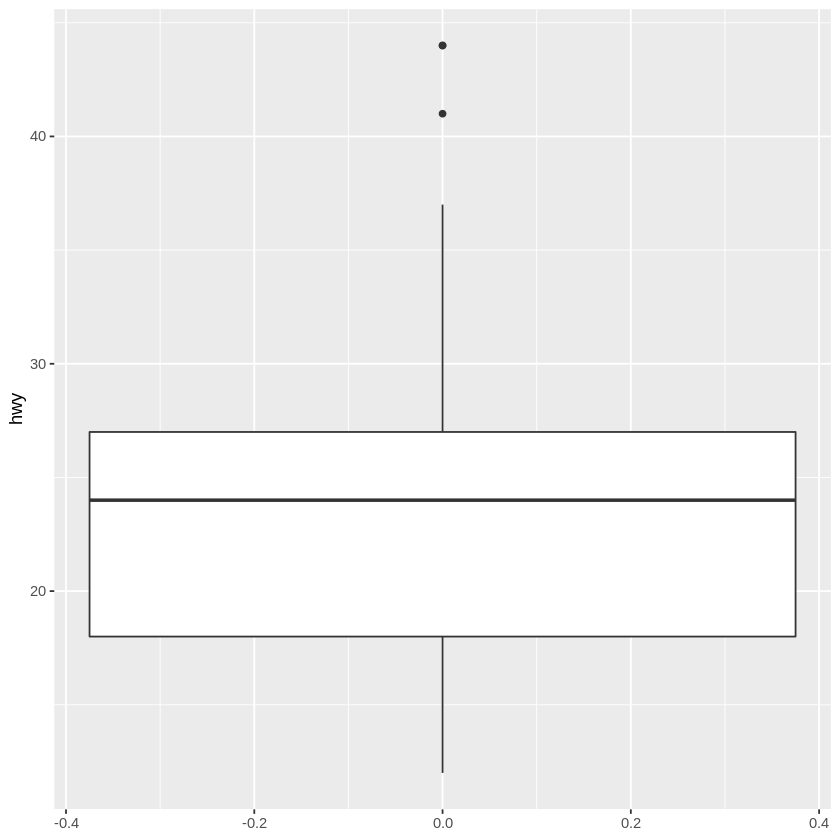

In [10]:
# recordar que podemos visualizar los cuartiles en un boxplot
mpg %>%
  ggplot() +
  aes(y = hwy) + 
  geom_boxplot()


In [14]:
# Rango Inter-cuartílico
# Una obs se considera "extrema" si si valor está por sobre (debajo) 1.5 veces el rango intercuartílico (RI = Q3- Q1)
hwy_iqr <- IQR(mpg$hwy)
hwy_iqr

quantile(mpg$hwy, 0.75 ) - quantile(mpg$hwy, 0.25 )

[1] 9

75% 
  9

In [15]:
# lim inf 1.5*IQR (por "debajo")
mpg %>% 
  filter(hwy >= quantile(mpg$hwy, 0.75 ) + 1.5*hwy_iqr)
# lim sup 1.5*IQR (por "arriba")


manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


In [19]:
# medidas de dispersión ---------------

# Rango
max(mpg$hwy) - min(mpg$hwy)

# Cómo saber cuál es el auto que tiene el menor rendimiento en carretera
mpg %>%
  filter(hwy == min(hwy))

mpg %>%
  filter(hwy == max(hwy))
# Desviación estándar
sd(mpg$hwy) # 5.9 (los rendimientos tienen en promedio una variación de 5.9 mpg respecto de la media.)







[1] 32

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact


[1] 5.954643

In [24]:
# Quiero calcular la desviación estándar para los 2seater y pickup
mpg %>% 
  filter(class %in% c("2seater", "pickup")) %>%
  group_by(class) %>%
  summarise(sd = sd(hwy),
            prom = mean(hwy),
            cv = sd/abs(prom))

`summarise()` ungrouping output (override with `.groups` argument)



class,sd,prom,cv
<chr>,<dbl>,<dbl>,<dbl>
2seater,1.30384,24.80000,0.05257421
pickup,2.27428,16.87879,0.13474189


In [ ]:
# grupo 1: sd 250k, prom 500k 
# grupo 2: sd 500k, prom 2000k

In [23]:
# Coef de variación = desviación estandar / |promedio|
250/500
500/2000 #este grupo tiene un menor grado de dispersión


[1] 0.5

[1] 0.25

## II. Correlación de variables

Las medidas de correlación buscan cuantificar el nivel de asociación que existe entre dos variables. Uno de los coeficientes más populares para medir la dependencia lineal entre dos variables corresponde al coeficiente de corelación de Pearson.

Matemáticamente, el coeficiente de correlación **de Pearson** entre dos variables aleatorias X e Y se define como 

$$\rho = \dfrac{\mathbb{E}[(X-\mu_X)(Y-\mu_Y)]}{\sqrt{\sigma^2_X\sigma^2_Y}}$$

Este coeficiente varía entre -1 y 1, y alcanza dichos valores siempre que X e Y formen una recta.

Exploremos algunos ejemplos






**¿Cómo es la relación entre el rendimiento en carretera y el tamaño del motor?**

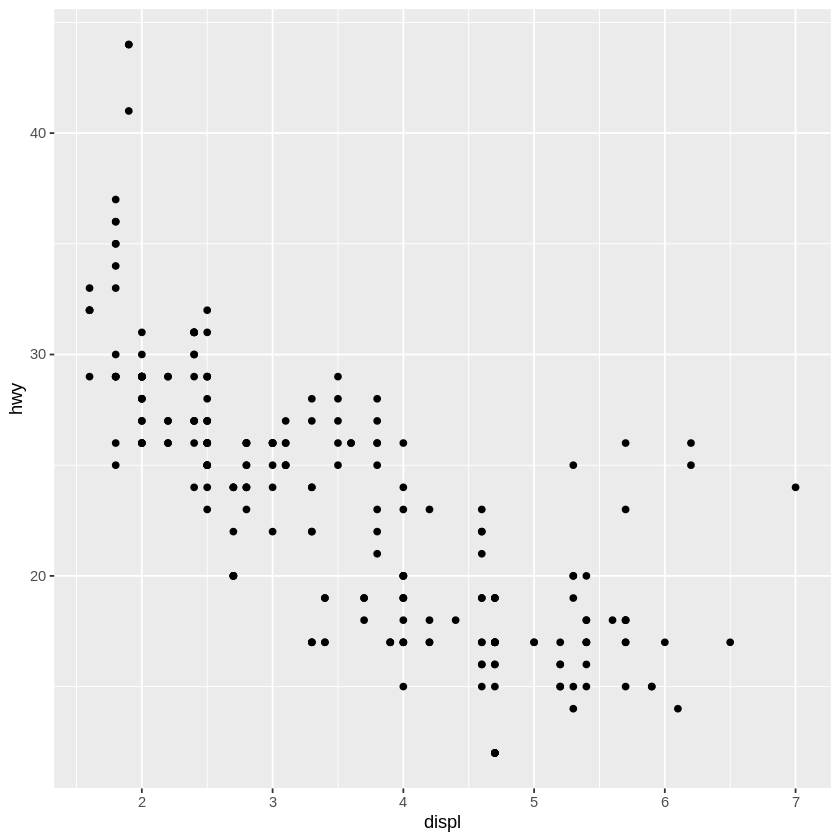

In [25]:
# Gráficamente x = displ, y = hwy
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point() 

`geom_smooth()` using formula 'y ~ x'



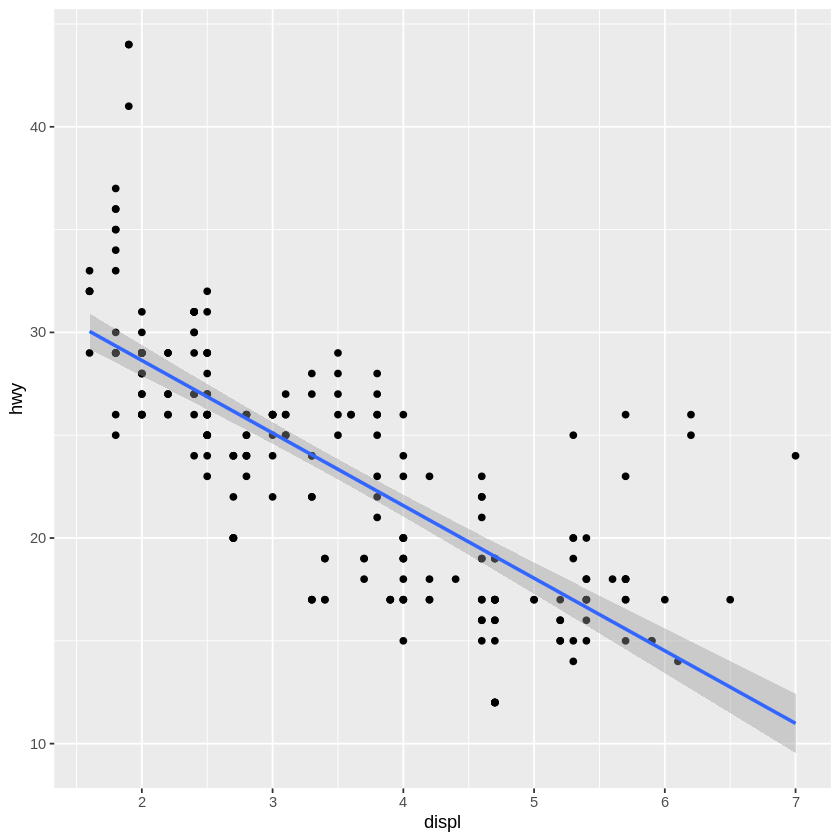

In [26]:
# podemos añadir "recta" de tendencia
ggplot(mpg, aes(x = displ, y = hwy)) +
  geom_point() + 
  geom_smooth(method = "lm")

Podemos seleccionar las columnas *mpg,disp,hp,drat,wt,qsec* y generar un gráfico de dispersión para cada par de ellas, con la función plot() del paquete _base_.

### P1. Comando cor
Investigue el comando cor y utilícelo con la selección previa de columnas.
¿Qué observa?

In [27]:
cor(mpg$hwy,mpg$displ)

[1] -0.76602

In [28]:
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [29]:
#Podemos graficar algunas de las variables de interés
aux <- mtcars %>% 
    select(mpg,disp,hp,drat,wt,qsec)

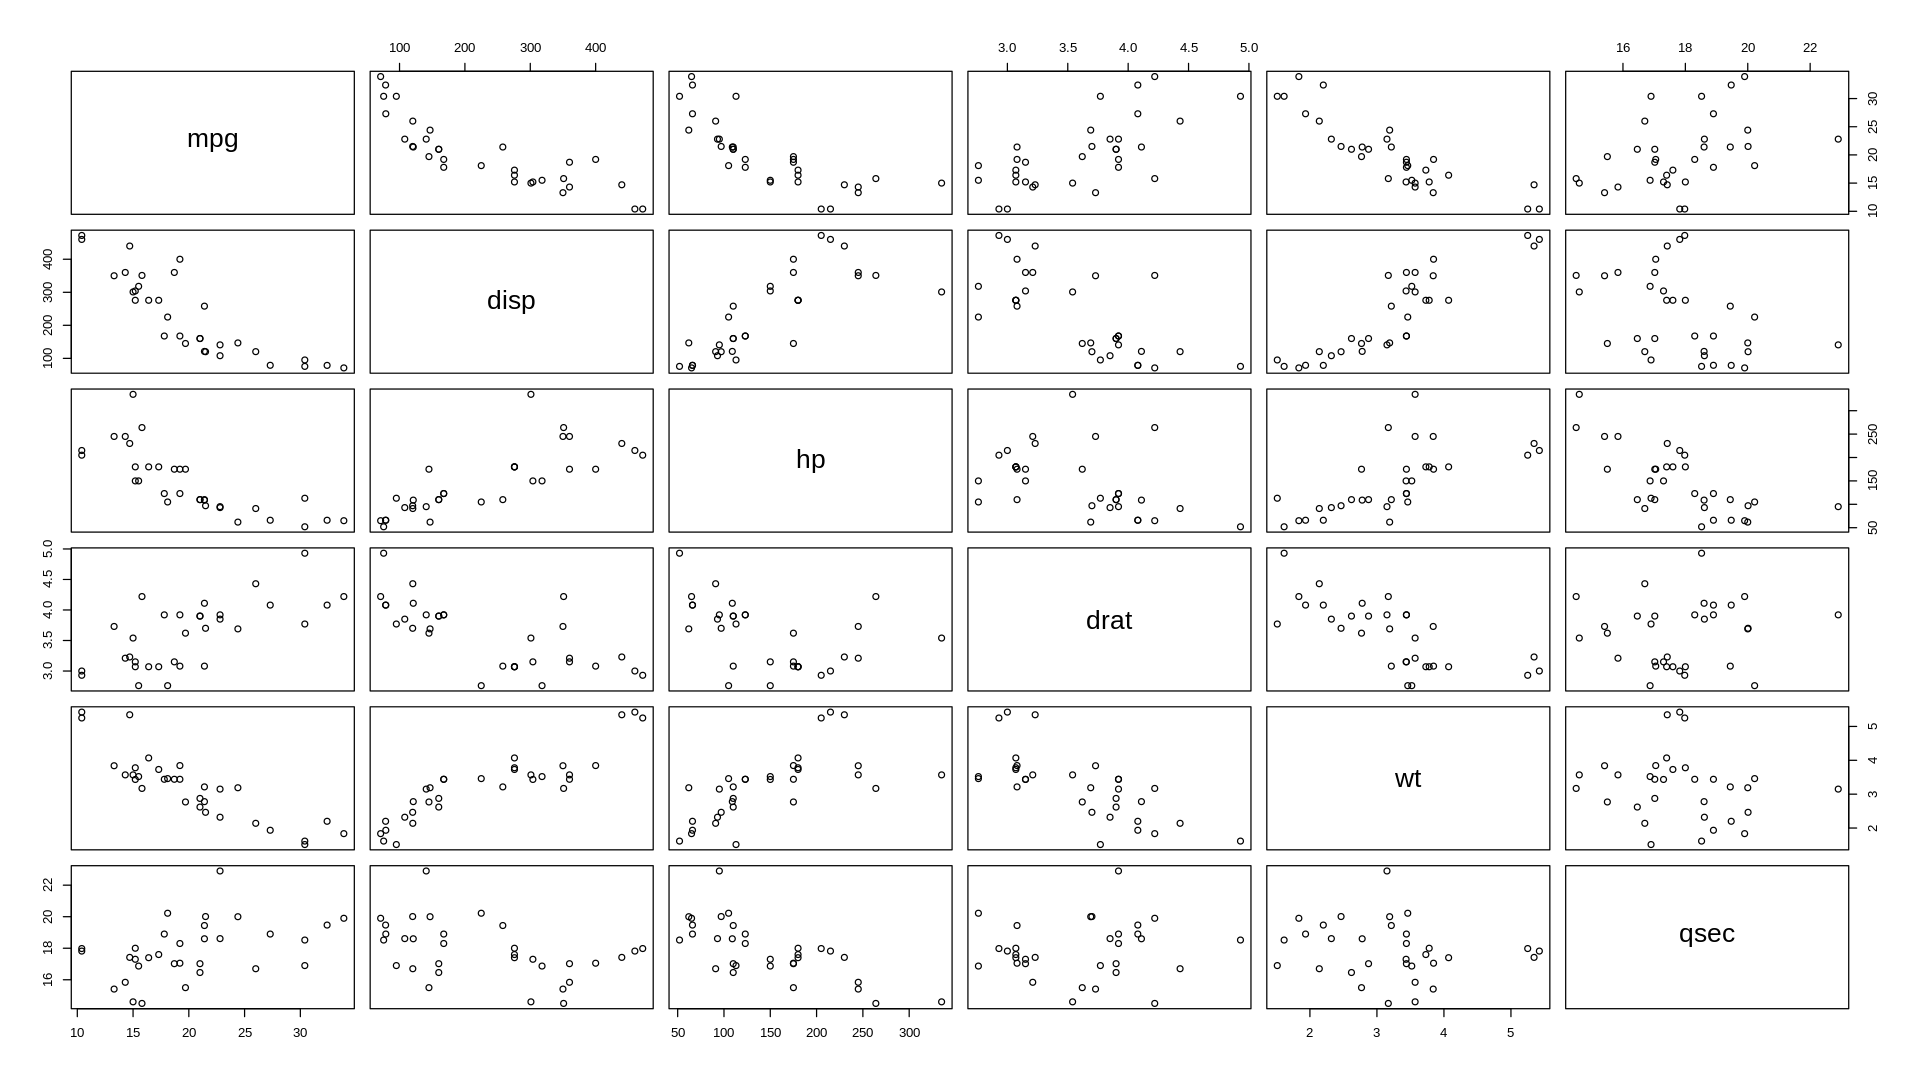

In [30]:
options(repr.plot.width=16, repr.plot.height=9)
plot(aux)

### P2. De acuerdo a  la documentación, cambie el método de cálculo a "spearman"
¿Que observa?

In [31]:
cor(aux) # por defecto calcula correlación de pearson


,mpg,disp,hp,drat,wt,qsec
mpg,1.0000000,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403
disp,-0.8475514,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788
hp,-0.7761684,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339
drat,0.6811719,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476
wt,-0.8676594,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588
qsec,0.4186840,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000


## NOTA: parámetro method de la función cor()

In [32]:
set.seed(123) # Semilla para generar númeos aleatorios
x <- rnorm(100) # variable X
e <- rnorm(100, sd = .5) # error aleatorio
# Modelar y como funcion de x y un error aleatorio
# y = f(x) + e
y <- 1+ 3*x^3 + e

A <- data.frame(x = x, y = y)


$y = f(x) + \epsilon$ \\
$y = 3x^{3} + 1 + \epsilon$

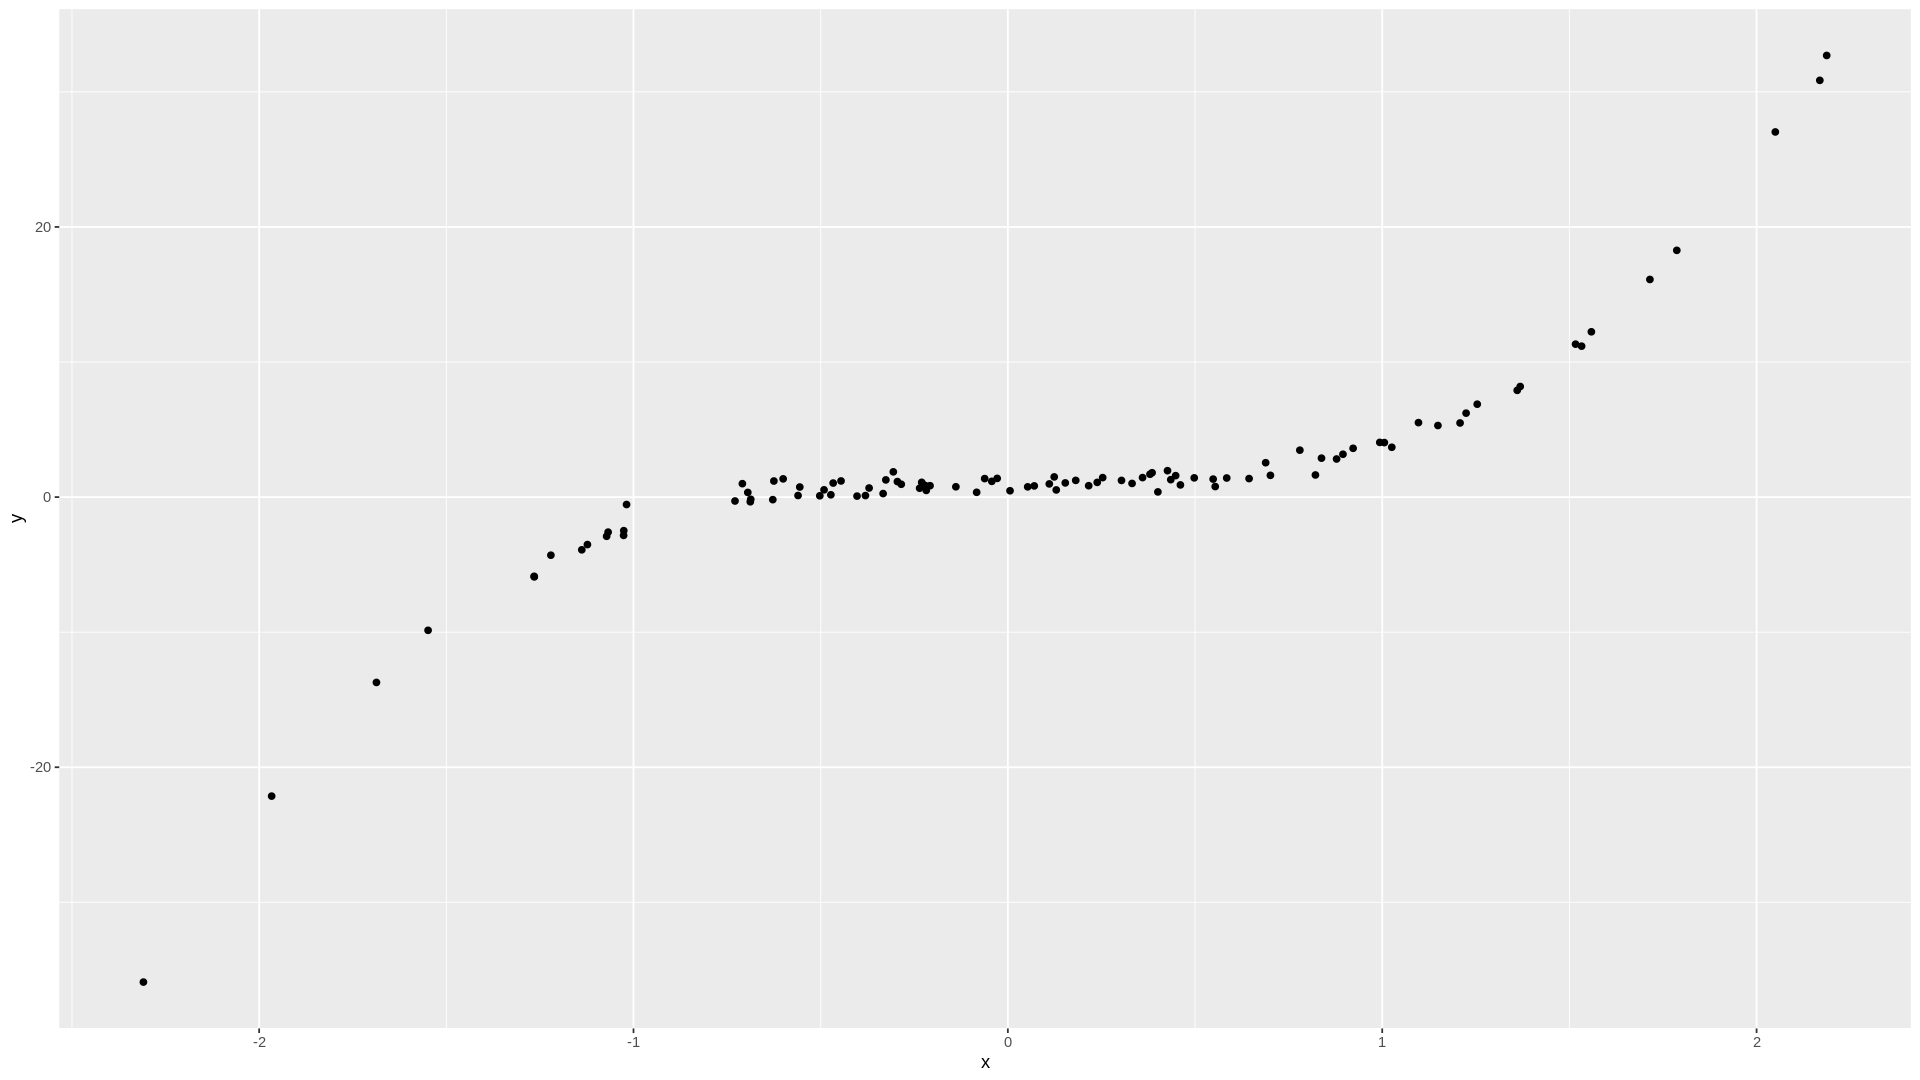

In [33]:
# Gráficamente la relación de x e  y 
  
A %>%
    ggplot() +
    aes(x = x, y = y) +
    geom_point()

In [35]:
# parámetro method de la función cor()
cor(A$x,A$y)
cor(A$x,A$y, method = "spearman")

[1] 0.8257649

[1] 0.9065107

## Gráfico de correlación

In [37]:
#install.packages("corrplot")
library(corrplot)

# función corrplot()

corrplot 0.84 loaded



### P3. Opciones de corrplot
Identifique (en la documentación de la función corplot) otros métodos de visualización 

In [38]:
matriz_cor <- cor(aux)
matriz_cor

,mpg,disp,hp,drat,wt,qsec
mpg,1.0000000,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403
disp,-0.8475514,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788
hp,-0.7761684,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339
drat,0.6811719,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476
wt,-0.8676594,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588
qsec,0.4186840,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000


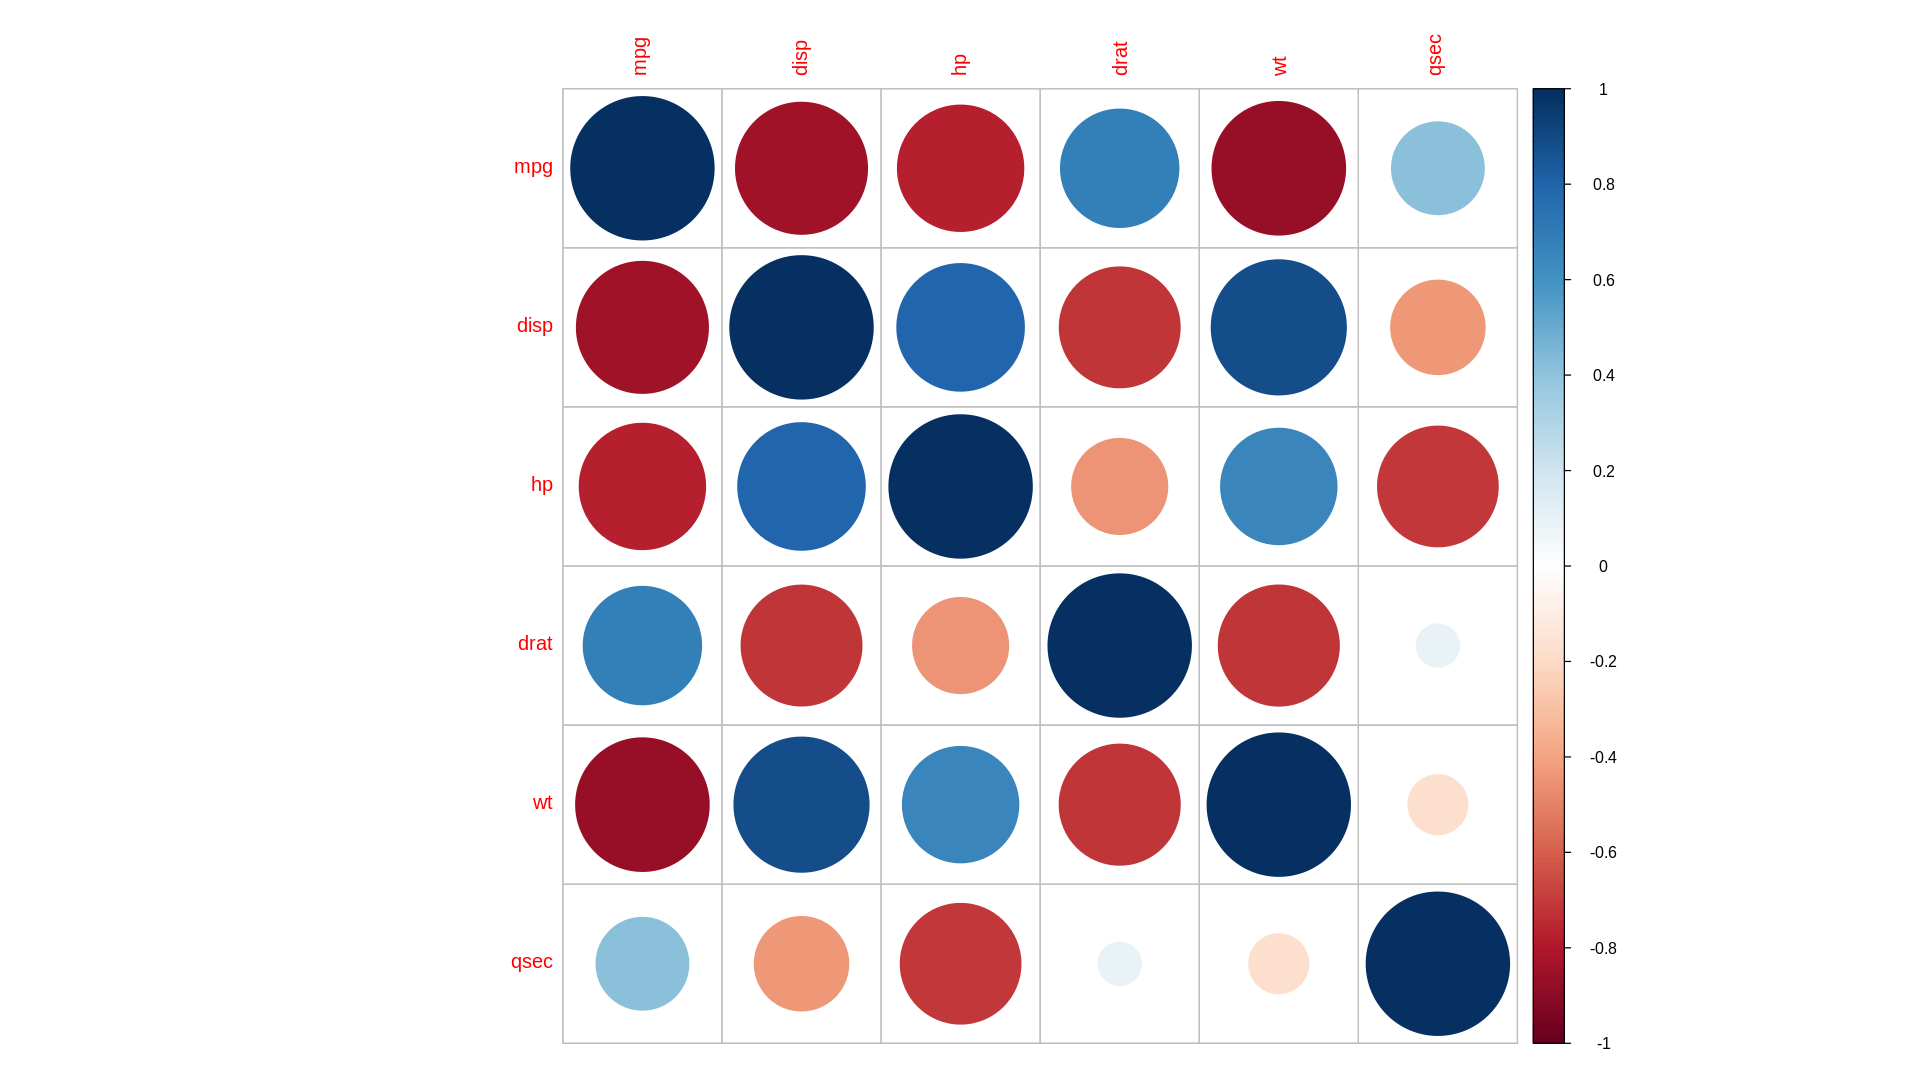

In [39]:
# Función corrplot()
# podemos modificar el parámetro "method"
corrplot(matriz_cor)